# Cơ bản về NumPy

Nội dung bài này tương ứng với Chương 4 - NumPy Basics: Arrays and Vectorized Computation

Các bạn xem phần đầy đủ của Chương này tại http://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch04.ipynb

### Thư viện NumPy cung cấp:

- ndarray, một kiểu mảng đa chiều hiệu quả cung cấp các phép toán số học trên mảng nhanh và hiệu quả
- các hàm toán học với thao tác nhanh trên toàn bộ mảng mà không cần dùng vòng lặp
- các công cụ để đọc và ghi dữ liệu mảng và làm việc với các tập tin
- các công cụ cho đại số tuyến tính, tạo số ngẫu nhiên và biến đổi Fourier
- tập hàm C để kết nối NumPy với các thư viện được viết bằng C, C++, FORTRAN

## ndarray

ndarray là 1 kiểu dữ liệu nhanh và linh hoạt cho 1 tập  dữ liệu, cho phép thực thi các thao tác toán học trên cả tập dữ liệu bằng cách sử dụng cú pháp tương tự như trên các kiểu dữ liệu cơ bản (scalar).

Ví dụ:

In [2]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[ 0.86457382,  0.67270863, -0.67947826],
       [-0.26172646,  0.32495444,  0.46238069]])

In [2]:
data * 10

array([[  0.44152734,  -4.52763682,  12.80260266],
       [-12.54135361, -12.79665134,  20.74564598]])

In [3]:
data + data

array([[ 0.08830547, -0.90552736,  2.56052053],
       [-2.50827072, -2.55933027,  4.1491292 ]])

ndarray có thể chứa bất kỳ kiểu dữ liệu nào, nhưng tất cả các thành phần đều phải cùng kiểu dữ liệu. Sử dụng thuộc tính shape và dtype để lấy kích thước và kiểu dữ liệu của mảng.

In [4]:
data.shape

(2, 3)

In [5]:
data.dtype

dtype('float64')

### Tạo mảng

#### Cách 1 - Tạo list, sau đó chuyển thành mảng

In [6]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
arr2.ndim

2

In [10]:
arr2.shape

(2, 4)

#### Cách 2 - Tạo mảng toàn số 0, toàn số 1

In [11]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [15]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### Cách 3 - tạo mảng với các số khác 0 và 1

In [13]:
np.empty((2, 3, 2))

array([[[6.93699954e-310, 2.68678622e+154],
        [0.00000000e+000, 4.94065646e-324],
        [0.00000000e+000, 3.76231786e+174]],

       [[0.00000000e+000, 4.99701762e+174],
        [0.00000000e+000, 1.25877533e-075],
        [0.00000000e+000, 8.34402697e-309]]])

#### Cách 4 - tạo mảng các số từ 0 đến n-1

In [14]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Tính toán số học

In [16]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [17]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [19]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [21]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Indexing và Slicing

#### Mảng 1 chiều

In [22]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
arr[5]

5

In [24]:
arr[5:8]

array([5, 6, 7])

In [25]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Một slide là một view của mảng gốc. Do đó, dữ liệu không được copy ra, nên bất kỳ sửa đổi trên view cũng sẽ ảnh hưởng đến mảng gốc. Ví dụ:

In [26]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [27]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

Nếu bạn cần thật sự copy một slide, bạn phải sử dụng hàm copy. Ví dụ: arr[5:8].copy()

#### Mảng nhiều chiều

Với mảng nhiều chiều, tại mỗi index bây giờ không còn là kiểu cơ bản (scalar) nữa mà sẽ là một mảng khác. Ví dụ:

In [28]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Lúc này để truy cập vào một thành phần nào đó thì cần nhiều hơn 1 cặp ngoặc vuông. Ví dụ:

In [29]:
arr2d[0][2]

3

Hoặc sử dụng dấu phẩy như sau:

In [30]:
arr2d[0, 2]

3

Ví dụ với mảng 3 chiều:

In [31]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Khi đó, arr3d[0] sẽ là 1 mảng 2 x 3:

In [32]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Lúc này, arr3d[0] có thể nhận cả giá trị kiểu cơ bản (scalar) hoặc mảng. Ví dụ:

In [33]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [35]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### Một số ví dụ khác

In [38]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [39]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

In [40]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [41]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [43]:
arr2d[1, :2]

array([4, 5])

In [44]:
arr2d[:2, 2]

array([3, 6])

In [45]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [46]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [48]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [49]:
data = np.random.randn(7, 4)
data

array([[ 0.36044168, -0.58301607,  1.19557463,  0.80433539],
       [-0.11169483, -0.1375177 ,  0.2612669 , -0.74779579],
       [ 0.44032522, -1.09337484, -0.54218737,  0.03887828],
       [ 1.94556899,  0.46508113,  1.81112642,  1.84965756],
       [ 1.02902374, -0.63251738, -0.46495626,  1.03119716],
       [ 0.14655561, -1.3604754 , -0.10772737, -0.07457166],
       [ 0.30995392, -2.81461232,  0.48233554,  0.65604741]])

In [50]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [51]:
data[names == 'Bob']

array([[ 0.36044168, -0.58301607,  1.19557463,  0.80433539],
       [ 1.94556899,  0.46508113,  1.81112642,  1.84965756]])

In [52]:
data[names == 'Bob', 2:]

array([[1.19557463, 0.80433539],
       [1.81112642, 1.84965756]])

In [53]:
names != 'Bob'
data[~(names == 'Bob')]

array([[-0.11169483, -0.1375177 ,  0.2612669 , -0.74779579],
       [ 0.44032522, -1.09337484, -0.54218737,  0.03887828],
       [ 1.02902374, -0.63251738, -0.46495626,  1.03119716],
       [ 0.14655561, -1.3604754 , -0.10772737, -0.07457166],
       [ 0.30995392, -2.81461232,  0.48233554,  0.65604741]])

In [54]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [55]:
data[mask]

array([[ 0.36044168, -0.58301607,  1.19557463,  0.80433539],
       [ 0.44032522, -1.09337484, -0.54218737,  0.03887828],
       [ 1.94556899,  0.46508113,  1.81112642,  1.84965756],
       [ 1.02902374, -0.63251738, -0.46495626,  1.03119716]])

In [56]:
data[data < 0] = 0
data

array([[0.36044168, 0.        , 1.19557463, 0.80433539],
       [0.        , 0.        , 0.2612669 , 0.        ],
       [0.44032522, 0.        , 0.        , 0.03887828],
       [1.94556899, 0.46508113, 1.81112642, 1.84965756],
       [1.02902374, 0.        , 0.        , 1.03119716],
       [0.14655561, 0.        , 0.        , 0.        ],
       [0.30995392, 0.        , 0.48233554, 0.65604741]])

In [57]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.2612669 , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.14655561, 0.        , 0.        , 0.        ],
       [0.30995392, 0.        , 0.48233554, 0.65604741]])

### Fancy Indexing

Chỉ mục sử dụng mảng các số nguyên.

In [58]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [59]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [60]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [61]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [62]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [63]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Ma trận chuyển vị

In [64]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [65]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Ví dụ tính inner matrix product sử dụng np.dot:

In [3]:
arr = np.random.randn(6, 3)
arr

array([[-0.39198936, -1.27374898,  0.48683118],
       [-0.36662449, -3.28169045, -0.1257059 ],
       [ 3.08704508,  1.1664284 , -0.23839485],
       [ 0.01395794,  0.47942763, -0.59832705],
       [-0.17449574, -0.68324722,  0.81005613],
       [ 3.41676178, -2.05944458, -0.69795667]])

In [4]:
np.dot(arr.T, arr)

array([[21.52282113, -1.60745477, -3.41513587],
       [-1.60745477, 18.69047349,  0.11143657],
       [-3.41513587,  0.11143657,  1.81096838]])

Ma trận chuyển vị cho mảng nhiều hơn 2 chiều.

In [5]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [6]:
arr.transpose((1, 0, 2)) # a tuple of axis numbers to per‐ mute the axes

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [7]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions

Là các hàm thực hiện các tính toán trên toàn bộ các thành phần của mảng.

In [8]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.sqrt(arr) # hàm 1 toán hạng

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [11]:
x = np.random.randn(8)
y = np.random.randn(8)

In [12]:
np.maximum(x, y) # hàm 2 toán hạng

array([ 0.78490935,  0.0742839 ,  1.36833309,  0.499194  ,  2.77751915,
       -0.35203195,  0.5389398 ,  0.90360457])

In [14]:
arr = np.random.randn(7) * 5
arr

array([-3.76380553, -3.58082205,  4.50640709,  1.43280606, -6.54817614,
       -1.50317891,  0.22949657])

In [16]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.76380553, -0.58082205,  0.50640709,  0.43280606, -0.54817614,
       -0.50317891,  0.22949657])

In [17]:
whole_part

array([-3., -3.,  4.,  1., -6., -1.,  0.])

In [18]:
arr

array([-3.76380553, -3.58082205,  4.50640709,  1.43280606, -6.54817614,
       -1.50317891,  0.22949657])

In [19]:
np.sqrt(arr, arr) # out argument

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 2.12282997, 1.19699877,        nan,
              nan, 0.479058  ])

In [20]:
arr

array([       nan,        nan, 2.12282997, 1.19699877,        nan,
              nan, 0.479058  ])

## Lập trình hướng mảng

In [22]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [26]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

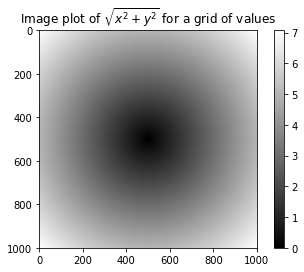

In [29]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar(); plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Logic điều khiển với mảng

In [30]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)] # sử dụng tính năng của list
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [31]:
result = np.where(cond, xarr, yarr) # sử dụng hàm where của ndarray
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [32]:
arr = np.random.randn(4, 4)
arr

array([[ 0.77002377, -1.79226726, -0.80011963,  0.23743427],
       [ 0.71501952, -0.71569742,  0.5387757 , -0.57271578],
       [-0.33896767,  0.41453001,  0.07404187, -0.46169201],
       [-1.46142997, -0.52680342, -1.07469823, -1.01891977]])

In [33]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [-2,  2,  2, -2],
       [-2, -2, -2, -2]])

In [34]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        , -1.79226726, -0.80011963,  2.        ],
       [ 2.        , -0.71569742,  2.        , -0.57271578],
       [-0.33896767,  2.        ,  2.        , -0.46169201],
       [-1.46142997, -0.52680342, -1.07469823, -1.01891977]])

### Hàm toán học và thống kê

In [35]:
arr = np.random.randn(5, 4)
arr

array([[-1.33938737,  0.21413102,  0.534674  ,  0.77621099],
       [-0.72217302,  1.21481378,  0.80837124,  0.43110777],
       [ 1.6106916 , -0.61529067, -0.14538636,  1.25495472],
       [ 0.47037061,  0.5624559 ,  0.5358904 , -0.07083646],
       [-1.21391286, -0.79987526, -0.29539558,  0.24098673]])

In [36]:
arr.mean()

0.17262005876915687

In [37]:
np.mean(arr)

0.17262005876915687

In [38]:
arr.mean(axis=1) # axis argument

array([ 0.04640716,  0.43302994,  0.52624232,  0.37447011, -0.51704924])

In [39]:
arr.sum(axis=0)

array([-1.19441103,  0.57623477,  1.43815369,  2.63242375])

In [40]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [41]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

### Hàm cho mảng Boolean

In [44]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

57

In [45]:
bools = np.array([False, False, True, False])
bools.any()

True

In [46]:
bools.all()

False

### Sắp xếp

In [47]:
arr = np.random.randn(6)
arr

array([-0.37983756,  1.58324046, -0.32713807,  0.55016518, -0.81491734,
        3.17202064])

In [48]:
arr.sort()
arr

array([-0.81491734, -0.37983756, -0.32713807,  0.55016518,  1.58324046,
        3.17202064])

In [49]:
arr = np.random.randn(5, 3)
arr

array([[ 0.66521133,  1.0204529 , -0.3392283 ],
       [-0.77855647, -1.03938697, -0.52264984],
       [ 0.4228465 , -0.79515751, -1.69573288],
       [-0.8845298 ,  0.53313381, -0.10197325],
       [-1.83702664, -0.89817427, -1.30840696]])

In [51]:
arr.sort(1)
arr

array([[-0.3392283 ,  0.66521133,  1.0204529 ],
       [-1.03938697, -0.77855647, -0.52264984],
       [-1.69573288, -0.79515751,  0.4228465 ],
       [-0.8845298 , -0.10197325,  0.53313381],
       [-1.83702664, -1.30840696, -0.89817427]])

In [52]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile - điểm vi phân

-1.7783057549929515

### Các phép toán về tập hợp

In [53]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [54]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## Đọc, ghi dữ liệu với tập tin

In [55]:
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
np.savez('array_archive.npz', a=arr, b=arr) # không nén
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Đại số tuyến tính

In [58]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [59]:
x.dot(y) # tích vô hướng, tương đương np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [60]:
x @ np.ones(3)

array([ 6., 15.])

In [61]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 0.83531737, -0.3082898 ,  0.35557918,  0.33877455,  0.05557281],
       [-0.3082898 ,  0.55308031, -0.03833469,  0.15321065,  0.24246716],
       [ 0.35557918, -0.03833469,  0.2994229 ,  0.25104243,  0.17888614],
       [ 0.33877455,  0.15321065,  0.25104243,  0.56676136,  0.12151687],
       [ 0.05557281,  0.24246716,  0.17888614,  0.12151687,  0.47331453]])

In [62]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  6.62288355e-17, -3.22543039e-17,
         4.85180548e-16,  0.00000000e+00],
       [ 4.68517024e-16,  1.00000000e+00,  5.47660081e-16,
         5.14583959e-16,  0.00000000e+00],
       [-2.56250063e-16,  3.58775848e-16,  1.00000000e+00,
        -6.16578100e-16,  0.00000000e+00],
       [-1.38968010e-16,  1.01953427e-18, -4.40012732e-17,
         1.00000000e+00,  0.00000000e+00],
       [ 5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
        -3.33066907e-16,  1.00000000e+00]])

In [64]:
q, r = qr(mat)
r

array([[ -6.41461172,  -5.69878959,   4.45199189,   3.73632551,
          1.20164542],
       [  0.        ,  -7.34165445, -13.87987416,   6.88073385,
          8.14974678],
       [  0.        ,   0.        ,  -3.62896993,   2.19787819,
          0.45333703],
       [  0.        ,   0.        ,   0.        ,  -1.61799215,
          1.1053565 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.7337718 ]])

## Random Walks

In [67]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [68]:
plt.figure()

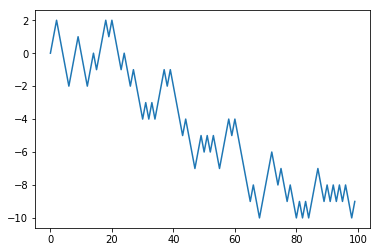

In [69]:
plt.plot(walk[:100])

In [70]:
np.random.seed(12345)

In [73]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-5

In [74]:
walk.max()

26

In [75]:
(np.abs(walk) >= 10).argmax() # first index of the maximum value

103

In [77]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       [  1,   2,   3, ...,  44,  45,  44],
       ...,
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22],
       [ -1,   0,  -1, ...,  24,  23,  22]])

In [78]:
walks.max()

138

In [79]:
walks.min()

-133

In [81]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ...,  True, False,  True])

In [82]:
hits30.sum()

3411

In [84]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times

array([735, 409, 253, ..., 453, 447, 909])

In [85]:
crossing_times.mean()

499.00996775139254